# Pandas-2

In [1]:
import pandas as pd

**Q1. Create a Pandas DataFrame with columns 'City', 'Temperature', and 'Humidity' containing the following data:**

**City                  Temperature    Humidity**

**New York                75             60**

**Chicago                 68             55**

**Los Angeles             85             45**

**Miami                   80             70**
       
**Display the rows where the Temperature is above 70.**

**Display the rows where the Humidity is below 60.**

**Display city with temperature 68 and humidity 55.**


In [12]:
#method-1
cities=["New York","Chicago","Los Angeles","Miami"]
temp=[75,68,85,80]
humidity=[60,55,45,70]
df1=pd.DataFrame({"City":cities,"Temperature":temp,"Humidity":humidity})
df1

,City,Temperature,Humidity
0,New York,75,60
1,Chicago,68,55
2,Los Angeles,85,45
3,Miami,80,70


In [14]:
df1[df1["Temperature"]>70]

,City,Temperature,Humidity
0,New York,75,60
2,Los Angeles,85,45
3,Miami,80,70


In [16]:
df1[df1["Humidity"]<60]

,City,Temperature,Humidity
1,Chicago,68,55
2,Los Angeles,85,45


In [18]:
df1[(df1['Temperature']==68) | (['Humidity']==55)]

,City,Temperature,Humidity
1,Chicago,68,55


**Q2. Create a Pandas DataFrame with the following data:**
    
**data = {'Name': ['Alice', 'Bob', 'Charlie', 'David'],'EmpID': [100,103,105,102]'Age': [25, 30, 35, 40],'Salary': [50000, 60000, 75000, 90000]}**

**Sort the DataFrame based on 'Age' in descending order and display it.**

**Convert the above Pandas DataFrame into a CSV file named 'employees.csv'. Replace the index with the 'EmpID' column permanently.**


In [20]:
data = {'Name': ['Alice', 'Bob', 'Charlie', 'David'],'EmpID': [100,103,105,102],'Age': [25, 30, 35, 40],'Salary': [50000, 60000, 75000, 90000]}
df2=pd.DataFrame(data)
df2

,Name,EmpID,Age,Salary
0,Alice,100,25,50000
1,Bob,103,30,60000
2,Charlie,105,35,75000
3,David,102,40,90000


In [22]:
df2.sort_values(by='Age',ascending=False)

,Name,EmpID,Age,Salary
3,David,102,40,90000
2,Charlie,105,35,75000
1,Bob,103,30,60000
0,Alice,100,25,50000


In [24]:
df_csv=df2.to_csv('employees.csv',index=False)
readcsv=pd.read_csv(r'employees.csv')
readcsv

,Name,EmpID,Age,Salary
0,Alice,100,25,50000
1,Bob,103,30,60000
2,Charlie,105,35,75000
3,David,102,40,90000


In [26]:
readcsv.columns

Index(['Name', 'EmpID', 'Age', 'Salary'], dtype='object')

In [28]:
set=readcsv.set_index('EmpID',inplace=True)
readcsv

,Name,Age,Salary
EmpID,,,
100,Alice,25,50000
103,Bob,30,60000
105,Charlie,35,75000
102,David,40,90000


In [30]:
readcsv.index

Index([100, 103, 105, 102], dtype='int64', name='EmpID')

**Q3. a.Add column 'Category' in the dataframe.**

**{'Category': ['A', 'B', 'C', 'A']}**
  
**b.Find and display the unique values in the 'Category' column.**

**c.Display only the rows where 'Salaries' are greater than 60000.**


In [36]:
data={'Category': ['A', 'B', 'C', 'A']}
df2['Category']=pd.DataFrame(data)
df2

,Name,EmpID,Age,Salary,Category
0,Alice,100,25,50000,A
1,Bob,103,30,60000,B
2,Charlie,105,35,75000,C
3,David,102,40,90000,A


In [38]:
#b
unique=df2['Category'].unique()
unique

array(['A', 'B', 'C'], dtype=object)

In [40]:
unique_count=df2['Category'].value_counts()
unique_count

Category
A    2
B    1
C    1
Name: count, dtype: int64

In [42]:
#c
sal=df2[df2['Salary']>60000]
sal

,Name,EmpID,Age,Salary,Category
2,Charlie,105,35,75000,C
3,David,102,40,90000,A


# pandas Outliers

**Q1. Identifying Outliers in Data:**

**a.You have a DataFrame sales_data with a column 'Revenue'. Identify and display the outliers in the 'Revenue' column.**

**data = {'Revenue': [1000, 1200, 950, 1300, 800, 15000, 1100, 1050, 1400, 900]}**

**b.You have a DataFrame stock_prices with columns 'Date' and 'Closing_Price'. Identify and display the outliers in the 'Closing_Price' column.**

**data = {'Date': ['2022-01-01', '2022-01-02', '2022-01-03', '2022-01-04', '2022-01-05'],'Closing_Price': [100, 120, 95, 130, 800]}**


In [44]:
#a
data = {'Revenue': [1000, 1200, 950, 1300, 800, 15000, 1100, 1050, 1400, 900]}
outlayer1=pd.DataFrame(data)
outlayer1

,Revenue
0,1000
1,1200
2,950
3,1300
4,800
5,15000
6,1100
7,1050
8,1400
9,900


In [46]:
#outlayer in the dataframe
outlayer1['Revenue'].max()

15000

<Axes: >

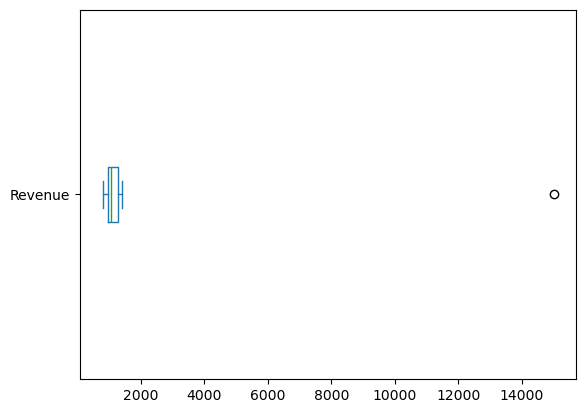

In [48]:
new=outlayer1['Revenue'].plot(kind='box',vert=False)
new

In [50]:
#treating outliers
q1=outlayer1['Revenue'].quantile(0.25)
q3=outlayer1['Revenue'].quantile(0.75)
print(q1)
print(q3)
iqr=q3-q1
print(iqr)
lowest=q1-1.5*iqr
highest=q3+1.5*iqr
print("highest_point",lowest)
print("lowest_point",highest)

962.5
1275.0
312.5
highest_point 493.75
lowest_point 1743.75


<Axes: >

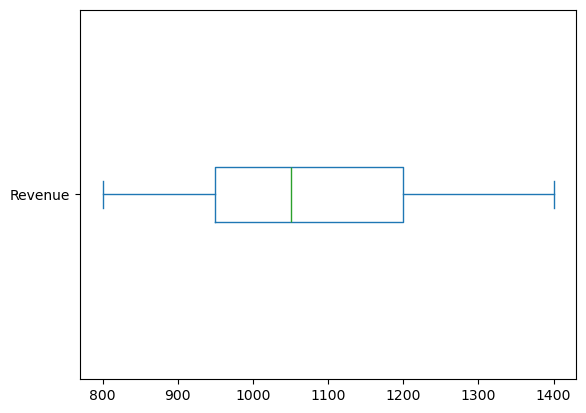

In [109]:
#removing and visualizing outliers
new_data=outlayer1[(outlayer1['Revenue']>=lowest) & (outlayer1['Revenue']<=highest)]
new_data['Revenue'].plot(kind='box',vert=False)

In [52]:
#b
data = {'Date': ['2022-01-01', '2022-01-02', '2022-01-03', '2022-01-04', '2022-01-05'],'Closing_Price': [100, 120, 95, 130, 800]}
outlayer2=pd.DataFrame(data)
outlayer2

,Date,Closing_Price
0,2022-01-01,100
1,2022-01-02,120
2,2022-01-03,95
3,2022-01-04,130
4,2022-01-05,800


<Axes: >

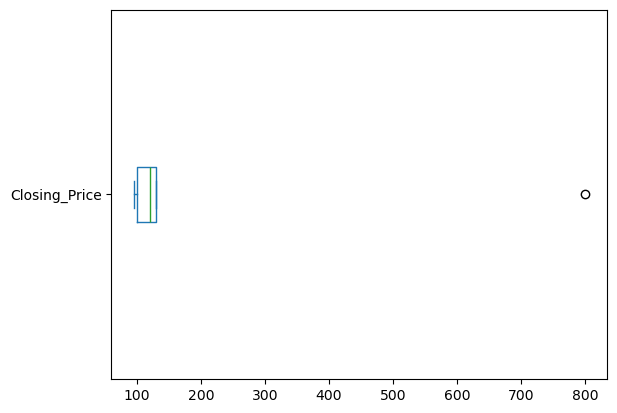

In [40]:
#dataFrame with outliers
outlayer2['Closing_Price'].plot(kind='box',vert=False)

In [54]:
#treating outliers
q1_2=outlayer2['Closing_Price'].quantile(0.25)
q3_2=outlayer2['Closing_Price'].quantile(0.75)
print(q1_2)
print(q3_2)
iqr=q3_2-q1_2
print(iqr)
lowest=q1_2-1.5*iqr
highest=q3_2+1.5*iqr
print("highest_point",lowest)
print("lowest_point",highest)

100.0
130.0
30.0
highest_point 55.0
lowest_point 175.0


<Axes: >

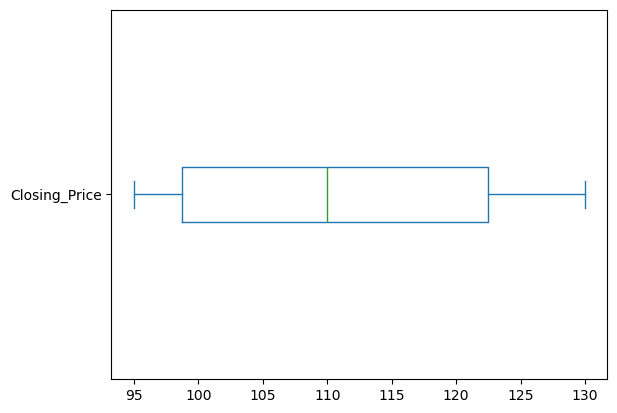

In [121]:
#removing and visualizing outliers
new_data=outlayer2[(outlayer2['Closing_Price']>=lowest) & (outlayer2['Closing_Price']<=highest)]
new_data['Closing_Price'].plot(kind='box',vert=False)

**Q2. Handling Outliers in Sales Data:**
    
**You have a DataFrame sales_data with columns 'Product', 'Quantity_Sold', and 'Price_Per_Unit'. Some entries have unusually high quantities sold.**

**data = {'Product': ['A', 'B', 'C', 'A', 'B', 'C'],
        'Quantity_Sold': [100, 1500, 120, 200, 80, 110],
        'Price_Per_Unit': [10, 5, 8, 12, 6, 10]}**

**Perform the following tasks-**
    
**a. Display the entries with unusually high quantities (potential outliers).**

**b. Replace the outliers with the median quantity sold.**


In [213]:
data = {'Product': ['A', 'B', 'C', 'A', 'B', 'C'], 'Quantity_Sold': [100, 1500, 120, 200, 80, 110], 'Price_Per_Unit': [10, 5, 8, 12, 6, 10]}
outlayer3=pd.DataFrame(data)
outlayer3

,Product,Quantity_Sold,Price_Per_Unit
0,A,100,10
1,B,1500,5
2,C,120,8
3,A,200,12
4,B,80,6
5,C,110,10


<Axes: >

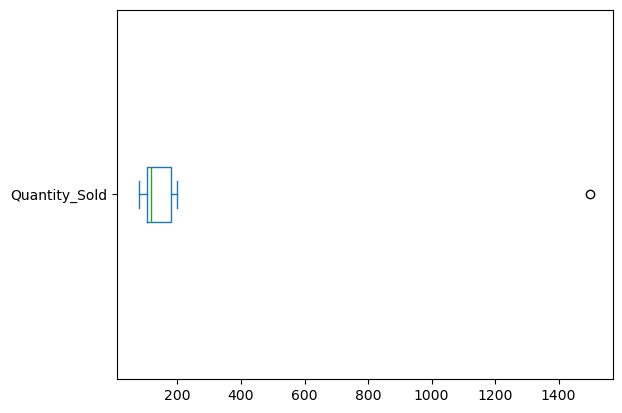

In [221]:
#plotting outlier
outlayer3['Quantity_Sold'].plot(kind='box',vert=False)

In [197]:
median=outlayer3['Quantity_Sold'].median()
median

115.0

In [199]:
outlayer_max=outlayer3['Quantity_Sold'].max()
outlayer_max

1500

In [223]:
#treating outliers
new=outlayer3['Quantity_Sold'].replace(outlayer_max,median)
new

0    100
1    115
2    120
3    200
4     80
5    110
Name: Quantity_Sold, dtype: int64

<Axes: >

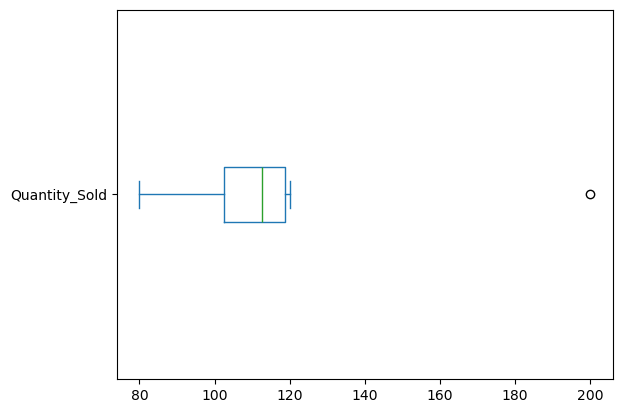

In [211]:
#plotting outlier after replacing it with median
new.plot(kind='box',vert=False)

**Q3. Visualizing Outliers:**

**a.You have a DataFrame exam_scores with a column 'Score'. Create a plot to visualize the distribution of exam scores and identify potential outliers.**
    
**data = {'Score': [85, 92, 78, 89, 95, 70, 88, 92, 78, 85]}**

**b.You have a DataFrame customer_data with columns 'CustomerID' and 'Spend'. Create a plot to visualize the relationship between customer spending and identify potential outliers.**
**data = {'CustomerID': [101, 102, 103, 104, 105],'Spend': [100, 150, 120, 800, 110]}**


In [193]:
#a
data = {'Score': [85, 92, 78, 89, 95, 70, 88, 92, 78, 85]}
df=pd.DataFrame(data)
df

,Score
0,85
1,92
2,78
3,89
4,95
5,70
6,88
7,92
8,78
9,85


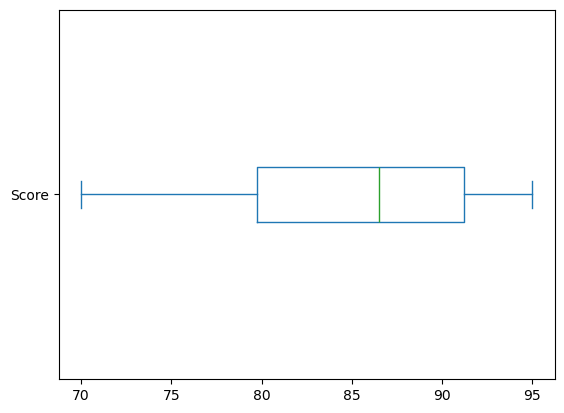

In [197]:
#no outliers are present in the data
df_1=df.plot(kind='box',vert=False)

In [66]:
#b.
data = {'CustomerID': [101, 102, 103, 104, 105],'Spend': [100, 150, 120, 800, 110]}
dff=pd.DataFrame(data)
dff

,CustomerID,Spend
0,101,100
1,102,150
2,103,120
3,104,800
4,105,110


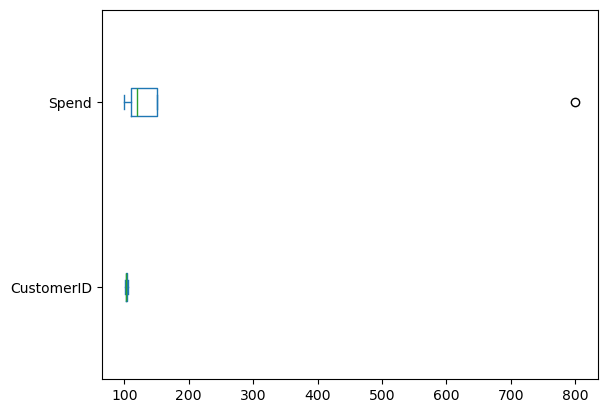

In [68]:
#identifying the plot
dff=dff.plot(kind='box',vert=False)

<Axes: >

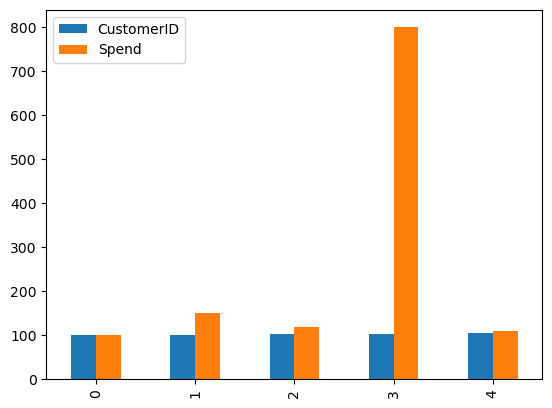

In [207]:
new_bar=dff.plot(kind='bar')